# Pymaceuticals Inc.
---

## Analysis
- The first broad, general observation we can see (from the pie charts) is that the split of male versus female mice included in the study is basically 50/50. This is a good sign that the study results could be generalized without any unknown sex or hormonal factors going unnoticed. 
- The second observation we can make from our data is that there is a strong positive relationship between mouse weight and the average tumor volume over time (0.84). 
- The third observation we can make is that, of the four drugs analyzed, Capomulin and Ramicane had the best results in reducing final tumor volume (as visualized in the box plot). It is important to note that these two drugs also had the most number of timepoints/mice tested, as shown in the bar graphs. While this might not skew the results in any way, It is still important to keep in mind. It might be worth repeating the study with the same number of mice in each treatment to ensure that there are no other factors making Capomulin  and Ramicane appear to be better options than other drugs, or making other drugs appear to perform worse than they actually do. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Merge on mouse ID, with how set to outer -> this will keep
# all of the data from both dataframes
mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="right")

# Display the data table for preview
mouse_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
5,h246,Ketapril,Male,13,30,0,45.0,0
6,p189,Ketapril,Male,8,28,0,45.0,0
7,n923,Ketapril,Male,19,30,0,45.0,0
8,q119,Ketapril,Male,17,30,0,45.0,0
9,f993,Naftisol,Male,21,28,0,45.0,0


In [2]:
# Find the total number of mice in the study
number_mice = mouse_df['Mouse ID'].nunique()
number_mice

249

In [3]:
# Check for duplicates in by Mouse ID and Timepoint using .duplicate()
duplicate_mice = mouse_df[mouse_df.duplicated(subset = ['Mouse ID','Timepoint'])]

# Get the duplicate mice by ID number and display
duplicate_mice_ID = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Use .isin() to filter the merged dataframe -> this will include 
# only the rows where the value in the 'Mouse ID' column is also in
# the duplicate mice list 
duplicate_info = mouse_df[mouse_df['Mouse ID'].isin(duplicate_mice_ID)]
duplicate_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Remove the duplicates and create a cleaned dataframe 
# Use the isin function, this time set to False -> this will include
# all of the mice IDs EXCEPT for the one that was found to be a duplicate 
cleaned_mouse_df = mouse_df[mouse_df['Mouse ID'].isin(duplicate_mice_ID)==False]
cleaned_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Check the number of mice in the cleaned dataframe
number_unique_mice = cleaned_mouse_df['Mouse ID'].nunique()
number_unique_mice

248

## Summary Statistics 

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# First create the grouped dataframe
mice_grouped = cleaned_mouse_df.groupby('Drug Regimen')

# Next calculate each summary statistic
tumor_mean = mice_grouped['Tumor Volume (mm3)'].mean()
tumor_median = mice_grouped['Tumor Volume (mm3)'].median()
tumor_variance = mice_grouped['Tumor Volume (mm3)'].var()
tumor_std = mice_grouped['Tumor Volume (mm3)'].std()
tumor_sem = mice_grouped['Tumor Volume (mm3)'].sem()

# Combine the series into one dataframe
summary_stats = pd.concat([tumor_mean, tumor_median, 
                          tumor_variance, tumor_std, 
                          tumor_sem], axis = 1)
# Rename the columns and set index
summary_stats.columns = ['Mean Tumor Volume','Median Tumor Volume',
                         'Tumor Volume Variance', 'Tumor Volume Standard Deviation',
                         'Tumor Volume Standard Error'
                         ]
summary_stats.index_name = 'Drug Regimen'
#Display the full dataframe
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# For a more advanced method of producing a summary statistics table with the mean, median,
# variance, standard deviation, and SEM, use the aggregate function 

advanced_summary = cleaned_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var', 'std','sem'])                                                                                                                                                                         
advanced_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts 

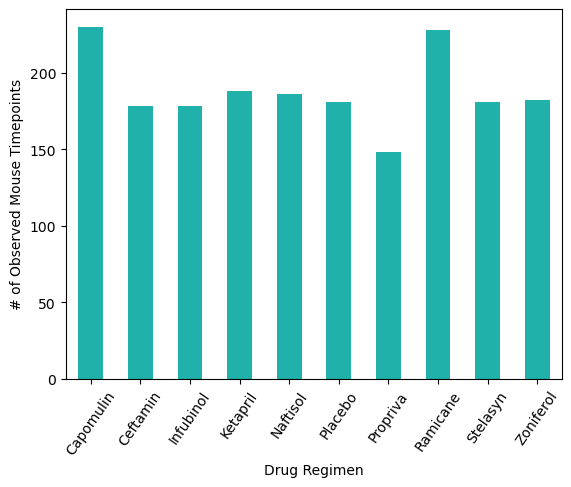

In [9]:
# Create a bar chart showing the total number of mice for each drug regimen using pandas
# First count the mice per treatment 
mice_per_drug = cleaned_mouse_df.groupby(['Drug Regimen'])['Mouse ID'].count()

# Next create the bar chart using the Dataframe.plot() method
mice_per_drug.plot(kind='bar', color='lightseagreen', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', rot=55)
plt.show()


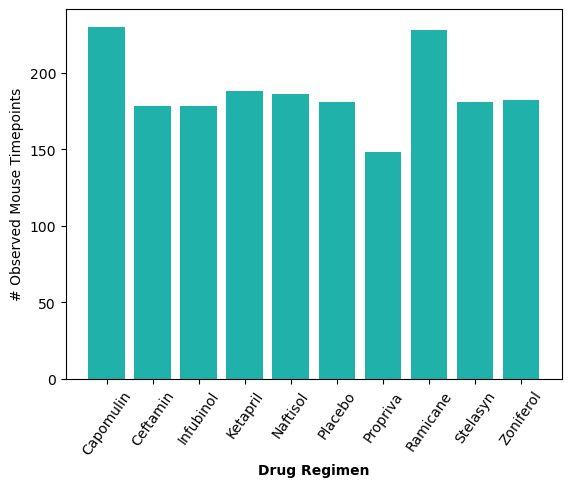

In [10]:
# Create a bar chart using pyplot
# First get the desired data from the mouse counts
drug = mice_per_drug.index
counts = mice_per_drug.values

# Next create the bar chart using matplotlib's pyplot method 
plt.bar(drug, counts, color = 'lightseagreen')
plt.xlabel('Drug Regimen', fontdict={'weight':'bold'})
plt.ylabel('# Observed Mouse Timepoints')
plt.xticks(rotation=55)
plt.show()

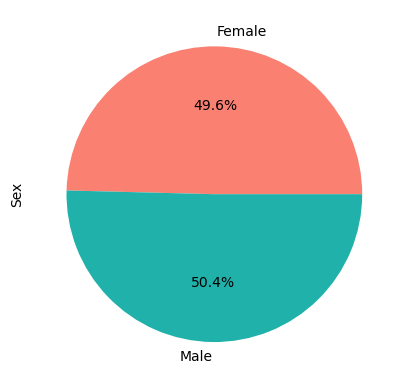

In [11]:
# Create a pie chart showing the trial distribution of male versus female mice using pandas
# First count the mice per gender
mice_gender = cleaned_mouse_df.groupby(['Sex'])['Mouse ID'].nunique()

# Next create the pie chart using the Dataframe.plot() method 
mice_gender.plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'lightseagreen'], ylabel='Sex')
plt.show()
                 

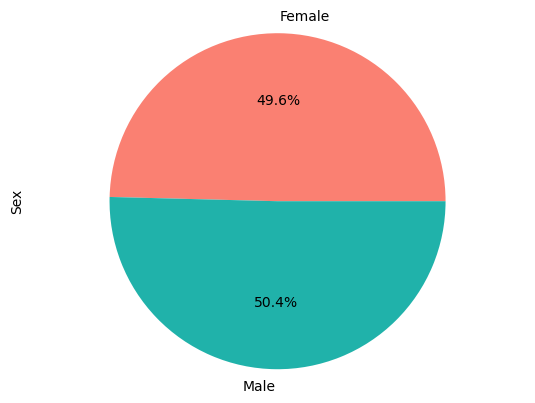

In [12]:
# Create a pie chart showing the trial distribution of male versus female mice using pyplot
# First get the desired data from the gender counts
gender_labels = mice_gender.index
gender_counts = mice_gender.values

# Create the pie chart using matplotlib's pyplot method
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', colors=['salmon','lightseagreen'])
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers, and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Do this by finding the maximum timepoint, then using reset index to return the grouped series 
# back to a dataframe, in order to easily merge with the original dataframe
max_timepoint = cleaned_mouse_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max_timepoint = pd.merge(max_timepoint, cleaned_mouse_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_max_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Next create a list of the effective treaments to use for the for loop and for plot labels
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create an empty list to fill with the final tumor volume data (to use for plotting)
final_tumor_vol = []

# Set up the for loop, which will loop through the treatments and select only the desired
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_regimen = merged_max_timepoint[merged_max_timepoint['Drug Regimen'] == treatment]
    tumor_volume = drug_regimen['Tumor Volume (mm3)']
    final_tumor_vol.append(tumor_volume)

    # Calculate the quartiles and IQR
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Find potential outliers by identifying any tumor volumes that are above or below the upper and lower boundaries
    potential_outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    # Print the results 
    if len(potential_outliers) == 0:
        print('No potential outliers found.')
    else:
        print(f'{treatment} potential outliers: {potential_outliers}')

No potential outliers found.
No potential outliers found.
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
No potential outliers found.


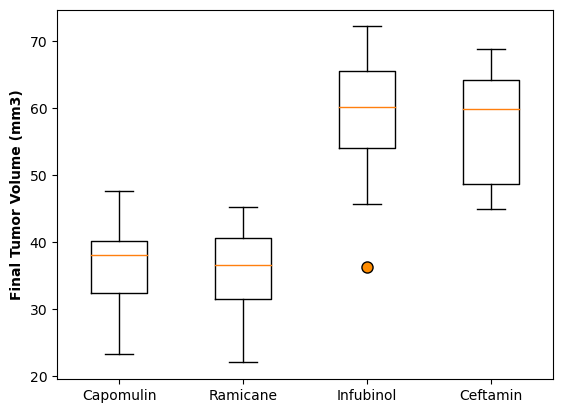

In [15]:
# Create a box plot that shows the distribution of the tumor volume
# for each drug treatment group
box_plot = plt.boxplot(final_tumor_vol)
# Create a custom outlier
custom_outlier = dict(marker='o', markerfacecolor='darkorange', markersize=8, markeredgecolor='black')
for outlier in box_plot['fliers']:
    outlier.set(**custom_outlier)
plt.xticks(range(1, len(treatments) + 1), treatments)
plt.ylabel('Final Tumor Volume (mm3)', fontdict={'weight':'bold'})
plt.show()

## Line and Scatter Plots

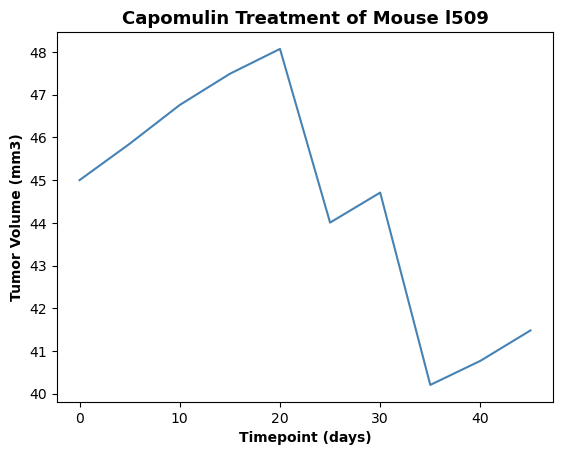

In [16]:
# Create a line plot of tumor volume versus timepoint for one single mouse
# treated with Capomulin

# First filter the cleaned mouse data for only those treated with Capulomin
capomulin_treated = cleaned_mouse_df[cleaned_mouse_df['Drug Regimen'] == 'Capomulin']

# Select a mouse at random to plot
random_mouse_id = capomulin_treated['Mouse ID'].sample(1).values[0]

# Use randomly selected mouse data for the mouse id
mouse_id = capomulin_treated[capomulin_treated['Mouse ID'] == random_mouse_id]

# Create a line plot using the mouse 
plt.plot(mouse_id['Timepoint'], mouse_id['Tumor Volume (mm3)'], linestyle='-', color='steelblue')
plt.title(f'Capomulin Treatment of Mouse {random_mouse_id}', fontdict={'weight':'bold', 'size':13})
plt.xlabel('Timepoint (days)', fontdict={'weight':'bold'})
plt.ylabel('Tumor Volume (mm3)', fontdict={'weight':'bold'})
plt.show()

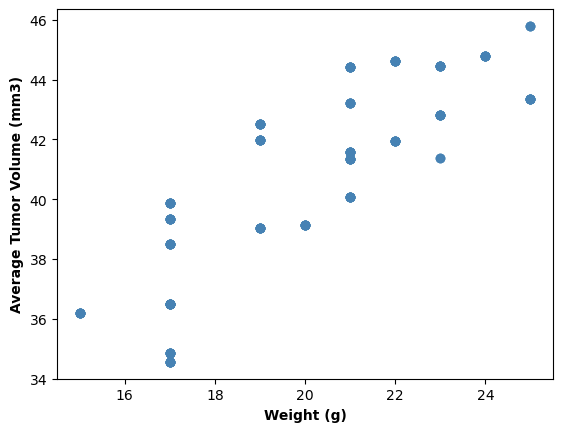

In [17]:
# Create a scatter plot of mouse weight versus the average observed tumor 
# volume for all mice on the Capomulin treatment 

# Calculate the average tumor volume for each mouse treated with Capomulin, using
# the grouped dataframe created above
# Group by Mouse ID to get the average tumor volume for each mouse, then use reset_index()
# to convert back to dataframe 
avg_tumor_vol = capomulin_treated.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume df with the capomulin treated df 
avg_tumor_merged = pd.merge(avg_tumor_vol, capomulin_treated[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Create the scatter plot
plt.scatter(avg_tumor_merged['Weight (g)'], avg_tumor_merged['Tumor Volume (mm3)'], marker='o', color='steelblue', alpha=0.75)
plt.xlabel('Weight (g)', fontdict={'weight':'bold'})
plt.ylabel('Average Tumor Volume (mm3)', fontdict={'weight':'bold'})
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.83


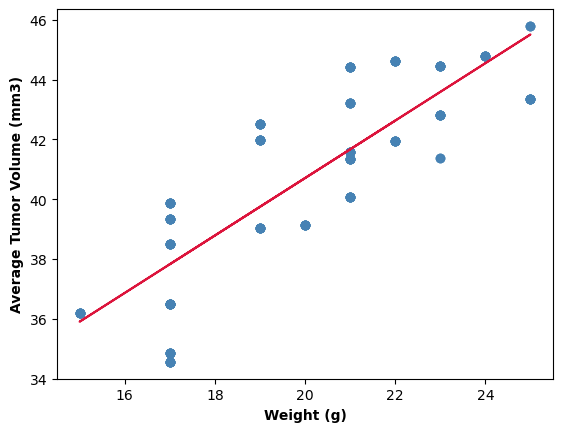

In [18]:
# Calculate the correlation coefficient and create a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Create x and y variables 
x_values = avg_tumor_merged['Weight (g)']
y_values = avg_tumor_merged['Tumor Volume (mm3)']

# Create the line regression
(slope, intercept, r_value, p_value, std_err) = st.linregress(x_values, y_values)

# Find the line equation values
regress_line = x_values * slope + intercept 

# Find the correlation coefficient
correlation = st.pearsonr(x_values, y_values)

# Create the plot
plt.scatter(avg_tumor_merged['Weight (g)'], avg_tumor_merged['Tumor Volume (mm3)'], marker='o', color='steelblue', alpha=0.75)
plt.plot(x_values, regress_line, color='crimson', linestyle='-')
plt.xlabel('Weight (g)', fontdict={'weight':'bold'}) 
plt.ylabel('Average Tumor Volume (mm3)', fontdict={'weight':'bold'})
print(f'The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}')
plt.show()

